# **MACHINE LEARNING AND PROGRAMMING IN PYTHON**

The main objective of this notebook is to present how to solve a binary classification problem with neuronal networks and programming in python.


For this project we made 4 models with the tools we learned in the MC course:


  -Model 1: Network extension

  -Model 2: Dropout

  -Model 3: Regularisation
  
  -Model 4: Decision tree

In this case we are working with HTRU2 which is a dataset describing a sample of candidate pulsars collected during the High Time Resolution Universe Survey.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).


# 1.-  **PACKGACES**
This first line of code loads the libraries we use to create the data analysis and the neural network.   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from typing import Optional, Union, Tuple
from google.colab import drive
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD
from keras import regularizers
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import (LogisticRegression,PassiveAggressiveClassifier,Perceptron,SGDClassifier)
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import plot_tree

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# 2.- **INPUT AND PREPROCESSING DATA**

In [ ]:
#This class facilitates loading, processing, splitting, and normalizing a dataset for machine learning tasks.

class DatasetProcessor:
    def __init__(self, filename: str, label_column: str, feature_column_range: Optional[Union[slice, list]] = None):
        self.filename = filename
        self.label_column = label_column
        self.feature_column_range = feature_column_range if feature_column_range else slice(0, 8)
        self.dataset = None
        self.label = None
        self.features = None
        self.X_train = None
        self.X_val = None
        self.X_test = None
        self.Y_train = None
        self.Y_val = None
        self.Y_test = None
        self.scaler = StandardScaler()
# Initializes the class with the dataset filename, label column name, and optional feature column range.

    def load_dataset(self) -> None:
        self.dataset = pd.read_csv(self.filename)
        print("Dataset loaded:")
        print("---------------------------\n",self.dataset.head())
        print("---------------------------\n",self.dataset.describe())
        print("---------------------------\n",self.dataset.info())
# Loads the dataset from the specified CSV file and prints information about it.

    def process_dataset(self) -> None:
        self.label = self.dataset[self.label_column]
        self.features = self.dataset.iloc[:, self.feature_column_range]
        print("---------------------------\nLabel info:")
        print(self.label.info())
        print("---------------------------\nFeatures info:")
        print(self.features.info())
        print("---------------------------\nLabel value counts:")
        print(self.dataset[self.label_column].value_counts())
#Extracts the target labels and feature columns from the loaded dataset.

    def split_dataset(self, test_size: int = 800, val_size: int = 839, random_state: int = 10) -> None:
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(
            self.features, self.label, test_size=test_size, random_state=random_state)
        self.X_train, self.X_val, self.Y_train, self.Y_val = train_test_split(
            self.X_train, self.Y_train, test_size=val_size, random_state=random_state)
        print("---------------------------\nTrain set dimension:", self.X_train.shape)
        print("Validation set dimension:", self.X_val.shape)
        print("Test set dimension:", self.X_test.shape)
# Splits the features and labels into training, validation, and test sets using the specified test size
# validation size, and random state for reproducibility. Prints the dimensions of each split.

    def normalize_data(self) -> None:
        self.scaler.fit(self.X_train)
        self.X_train = self.scaler.transform(self.X_train)
        self.X_val = self.scaler.transform(self.X_val)
        self.X_test = self.scaler.transform(self.X_test)
        print("---------------------------\nNormalization complete.\n")
        print("Mean:", self.scaler.mean_)
        print("Variance:", self.scaler.var_)
# Normalizes the training, validation, and test sets using scikit-learn's StandardScaler.

    def execute(self) -> None:
        self.load_dataset()
        self.process_dataset()
        self.split_dataset()
        self.normalize_data()
"""
    Executes the entire data processing pipeline in the following order:

    1. Load the dataset.
    2. Process the dataset (extract labels and features).
    3. Split the dataset into training, validation, and test sets.
    4. Normalize the training, validation, and test sets.
"""


'\n    Executes the entire data processing pipeline in the following order:\n\n    1. Load the dataset.\n    2. Process the dataset (extract labels and features).\n    3. Split the dataset into training, validation, and test sets.\n    4. Normalize the training, validation, and test sets.\n'

In [ ]:
dataset_filename = '/content/gdrive/MyDrive/exercise machine learning/proyecto/HTRU_2.csv'
label_column = 'Class'  # Specifies the label column

# Create an instance of the data processor
processor = DatasetProcessor(dataset_filename, label_column)

# Execute the whole process
processor.execute()

Dataset loaded:
---------------------------
          Mean        Std  Kurtosis  Skewness  Mean_DMSNR  Std_DMSNR  \
0  140.562500  55.683782 -0.234571 -0.699648    3.199833  19.110426   
1  102.507812  58.882430  0.465318 -0.515088    1.677258  14.860146   
2  103.015625  39.341649  0.323328  1.051164    3.121237  21.744669   
3  136.750000  57.178449 -0.068415 -0.636238    3.642977  20.959280   
4   88.726562  40.672225  0.600866  1.123492    1.178930  11.468720   

   Kurtosis_DMSNR   Skewness_DMSNR  Class  
0        7.975532        74.242225      0  
1       10.576487       127.393580      0  
2        7.735822        63.171909      0  
3        6.896499        53.593661      0  
4       14.269573       252.567306      0  
---------------------------
                Mean           Std      Kurtosis      Skewness    Mean_DMSNR  \
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000   
mean     111.079968     46.549532      0.477857      1.770279     12.614400  

In [ ]:
processor.X_train


array([[ 0.74151506, -0.01836133, -0.49211489, ...,  0.08719536,
        -0.4997109 , -0.62826121],
       [ 0.04794883, -0.07486235, -0.01663503, ..., -0.83212422,
         1.98031682,  2.46953678],
       [-3.3295758 , -2.45787556,  6.03697181, ...,  2.08477429,
        -1.61194938, -0.98227024],
       ...,
       [ 0.86314   ,  0.48662156, -0.41278254, ..., -0.70187827,
         0.39673   ,  0.434069  ],
       [-0.08036548,  0.19630556, -0.27048245, ..., -0.22118841,
        -0.07095781, -0.32521296],
       [-0.41848282,  0.19955314, -0.27674603, ..., -0.84222834,
         2.01080266,  2.62335512]])

# 3.- **MODELS CLASS**

In [ ]:
# This class facilitates training, evaluation, and visualization of machine learning models.
class ModelTraining:
    def __init__(self, X_train, Y_train, X_val, Y_val, model_name):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_val = X_val
        self.Y_val = Y_val
        self.model = None
        self.history = None
        self.model_name = model_name
# Initializes the class with the training, validation sets, and the model name.

    def build_model(self, architecture):
        self.model = architecture.model
        self.model.compile(
            loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy']
        )
        print(f"{self.model_name}: {self.get_model_description()}")
"""
Builds and compiles the Keras model based on the provided architecture.

Sets the model attribute and compiles it with a binary cross-entropy loss function,
Adam optimizer with a learning rate of 0.001, and accuracy metric. Prints a summary of the model
"""
    def train_model(self, epochs, batch_size=64):
        self.history = self.model.fit(
            self.X_train, self.Y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(self.X_val, self.Y_val)
        )
# Trains the model on the training data with validation.

    def plot_history(self):
        if self.history is None:
            print("El modelo no ha sido entrenado aún.")
            return

        hist = pd.DataFrame(self.history.history)

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
        fig.suptitle(self.model_name, fontsize=16)

        # Plot loss
        axes[0].plot(hist.index, hist['loss'], 'r--', label='Training Loss')
        axes[0].plot(hist.index, hist['val_loss'], 'r-', label='Validation Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].set_title('Loss')

        # Plot accuracy
        axes[1].plot(hist.index, hist['accuracy'], 'b--', label='Training Accuracy')
        axes[1].plot(hist.index, hist['val_accuracy'], 'b-', label='Validation Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_ylim(0.6, 1)
        axes[1].legend()
        axes[1].set_title('Accuracy')

        plt.show()

    def evaluate_model(self, X_test, y_test):
        # Model evaluation in the validation set
        val_loss, val_accuracy = self.model.evaluate(self.X_val, self.Y_val)

        print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

        # Model evaluation in the test set
        test_loss, test_accuracy = self.model.evaluate(X_test, y_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')



    def plot_confusion_matrix(self):
        y_val_pred_ = self.model.predict(self.X_val)
        y_val_pred = (y_val_pred_ >= 0.5) * 1
        cm = confusion_matrix(self.Y_val, y_val_pred)
        cm_disp = ConfusionMatrixDisplay(cm,display_labels=['Non pulsar', 'Pulsar'])
        cm_disp.plot()
        plt.show()

        print("Accuracy:", accuracy_score(self.Y_val, y_val_pred))
        print("Precision:", precision_score(self.Y_val, y_val_pred))
        print("Recall:", recall_score(self.Y_val, y_val_pred))
        print("F1 Score:", f1_score(self.Y_val, y_val_pred))


    def plot_roc_curve_with_thresholds(self):
        y_val_pred_ = self.model.predict(self.X_val)
        fpr, tpr, thresholds = roc_curve(self.Y_val, y_val_pred_)
        auc_value = auc(fpr, tpr)

        idx_threshold_05 = (thresholds < 0.5).argmax()
        tpr_05 = tpr[idx_threshold_05]
        fpr_05 = fpr[idx_threshold_05]

        plt.plot(fpr, tpr, label="ROC curve")
        plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
        plt.plot([fpr_05], [tpr_05], 'ko', label='Point at threshold 0.5')
        plt.text(0., 1, "AUC: {:.3f}".format(auc_value))
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

    def plot_roc_curve_with_efficiency_rejection(self):
        y_val_pred_ = self.model.predict(self.X_val)
        fpr, tpr, thresholds = roc_curve(self.Y_val, y_val_pred_)
        auc_value = auc(fpr, tpr)

        idx_threshold_05 = (thresholds < 0.5).argmax()
        tpr_05 = tpr[idx_threshold_05]
        fpr_05 = fpr[idx_threshold_05]

        plt.plot(tpr, 1 - fpr, label="ROC curve")
        plt.plot([0, 1], [1, 0], 'k:', label="Random classifier's ROC curve")
        plt.plot([tpr_05], [1 - fpr_05], 'ko', label='Point at threshold 0.5')
        plt.text(0.8, 1, "AUC: {:.3f}".format(auc_value))
        plt.xlabel("Signal Efficiency (TPR)")
        plt.ylabel("Background Rejection (1 - FPR)")
        plt.legend()


    def plotroc(self, models):
        colors = ['k', 'b', 'g', 'r', 'c', 'm', 'y']
        id = 0
        for model in models:
            y_val_pred_ = model.predict(self.X_val)
            fpr, tpr, thresholds = roc_curve(self.Y_val, y_val_pred_)
            AUC = auc(fpr, tpr)
            plt.plot(tpr, 1 - fpr, colors[id], label="Model {}, AUC: {:.3f}".format(id, AUC,))
            id += 1

        plt.plot([0, 1], [1, 0], 'k:', label="Random classifier")
        plt.xlabel("signal efficiency (tpr)")
        plt.ylabel("background rejection (1-fpr)")
        plt.legend()
        plt.show()

"""
Plots the training and validation loss and accuracy curves if the model has been trained.

Checks if the history attribute is None (indicating no training yet).
If trained, extracts loss and accuracy values from the history and creates a plot with two subplots:
- One for loss (training and validation)
- One for accuracy (training and validation)
        """

    def evaluate_model(self):
        return self.model.evaluate(self.X_val, self.Y_val)
        return self.cusmodel.evaluate(self.X_val, self.Y_val)
"""
Uses the `model.evaluate` method to evaluate the model's performance on the validation data
    (X_val and Y_val). Returns a tuple containing the validation loss and accuracy.
"""

    def get_model_description(self):
        return self.model.summary()
#Returns a summary of the model architecture.

In [ ]:
# This class defines a basic neural network architecture with configurable layers.

class NeuralNetworkModel:

# Initializes the class with hyperparameters for the neural network architecture.
    def __init__(self, num_layers, layer_sizes, activations, dropout_rate=None, kernel_regularizer=None, seed=None):
        self.num_layers = num_layers
        self.layer_sizes = layer_sizes
        self.activations = activations
        self.dropout_rate = dropout_rate
        self.kernel_regularizer = kernel_regularizer
        self.seed = seed
        self.model = self.build_model()

"""
        Builds a sequential Keras model based on the provided hyperparameters.

        Creates a sequential model, adds an input layer for 8 features, and iterates through the specified number of layers:

        - Adding a Dense layer with the corresponding size from layer_sizes and activation from activations.
        - Optionally adding a Dropout layer with the specified rate and seed (for all hidden layers except the last).

        Returns the compiled Keras model.
"""
    def build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Input(shape=(8,)))

        for i in range(self.num_layers):
            layer_size = self.layer_sizes[i]
            activation = self.activations[i]
            if self.dropout_rate and i < self.num_layers - 1:
                model.add(tf.keras.layers.Dense(layer_size, activation=activation, kernel_regularizer=self.kernel_regularizer))
                model.add(tf.keras.layers.Dropout(rate=self.dropout_rate, seed=self.seed))
            else:
                model.add(tf.keras.layers.Dense(layer_size, activation=activation, kernel_regularizer=self.kernel_regularizer))

        return model

In [ ]:
# This class defines a custom model for classification tasks, currently supporting decision trees.

class CustomModel:

"""
Initializes the class with the model type and hyperparameter.

 Arguments:
          model_type (str, optional): The type of model to create (defaults to 'decision_tree').
          max_depth (int, optional): Maximum depth for the decision tree (defaults to None).
"""

    def __init__(self, model_type='decision_tree', max_depth=None):
        self.model_type = model_type
        self.max_depth = max_depth
        self.model = None


"""
    Trains the model based on the provided training data.

    Checks the model_type and raises an error if not 'decision_tree'.
    Creates a DecisionTreeClassifier object with the specified max_depth.
    Fits the model to the training data (X_train, Y_train).
    Optionally visualizes the decision tree (if trained on a decision tree).
"""

    def train(self, X_train, Y_train):
        if self.model_type == 'decision_tree':
            self.model = DecisionTreeClassifier(criterion="entropy", max_depth=self.max_depth)
        else:
            raise ValueError("Model type not recognized.")

        self.model.fit(X_train, Y_train)

        if self.model_type == 'decision_tree':
            plt.figure(figsize=(20,10))
            plot_tree(self.model, filled=True, feature_names=processor.features.columns[processor.feature_column_range], class_names=['Non pulsar', 'Pulsar'])
            plt.show()

"""
  Evaluates the trained model on the provided test data.
  Calculates and prints the training and test accuracy using the model's score method.
"""
    def evaluate(self, X_test, Y_test):

        train_accuracy = self.model.score(processor.X_train, processor.Y_train)
        test_accuracy = self.model.score(processor.X_test, processor.Y_test)

        print("Train accuracy:", train_accuracy)
        print("Test accuracy:", test_accuracy)


"""
Generates and plots the confusion matrix for the trained model.

Checks if the model is trained (if self.model is None).
Predicts labels for the test data using model.predict.
Creates a confusion matrix using confusion_matrix.
Plots the confusion matrix using ConfusionMatrixDisplay.
Prints various evaluation metrics (accuracy, precision, recall, F1-score).
"""

    def plot_confusion_matrix(self, X_test, Y_test):

        y_pred = self.model.predict(X_test)
        cm = confusion_matrix(Y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm,display_labels=['Non pulsar', 'Pulsar'])
        disp.plot()
        print("Accuracy:", accuracy_score(Y_test, y_pred))
        print("Precision:", precision_score(Y_test, y_pred))
        print("Recall:", recall_score(Y_test, y_pred))
        print("F1 Score:", f1_score(Y_test, y_pred))

    def plot_roc_curve(self, X_test, Y_test):


        y_score = self.model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, y_score)
        auc_value = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    def plot_roc_curve_with_efficiency_rejection(self, X_val, Y_val):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")

        y_val_pred_ = self.model.predict(X_val)
        fpr, tpr, thresholds = roc_curve(Y_val, y_val_pred_)
        auc_value = auc(fpr, tpr)

        idx_threshold_05 = (thresholds < 0.5).argmax()
        tpr_05 = tpr[idx_threshold_05]
        fpr_05 = fpr[idx_threshold_05]

        plt.plot(tpr, 1 - fpr, label="ROC curve")
        plt.plot([0, 1], [1, 0], 'k:', label="Random classifier's ROC curve")
        plt.plot([tpr_05], [1 - fpr_05], 'ko', label='Point at threshold 0.5')
        plt.text(0.8, 1, "AUC: {:.3f}".format(auc_value))
        plt.xlabel("Signal Efficiency (TPR)")
        plt.ylabel("Background Rejection (1 - FPR)")
        plt.legend()
        plt.show()


In [ ]:
#   MODEL 4: DECISION TREE
custom_model = CustomModel(model_type='decision_tree', max_depth=4)


In [ ]:
#   MODEL 1: NEURONAL NETWORKS
model_1 = NeuralNetworkModel(num_layers=5,
                             layer_sizes=[16,8, 4, 2, 1],
                             activations=['relu','relu', 'relu', 'relu', 'sigmoid'])

#   MODEL 2: NEURONAL NETWORKS +  DROPOUT
model_2 = NeuralNetworkModel(num_layers=4,
                             layer_sizes=[6, 2, 2, 1],
                             activations=['relu', 'relu', 'relu', 'sigmoid'],
                             dropout_rate=0.16, seed=10)

#   MODEL 3: NEURONAL NETWORKS + L1 REGULARIZATION
model_3 = NeuralNetworkModel(num_layers=3,
                             layer_sizes=[6, 4, 1],
                             activations=['relu', 'relu', 'sigmoid'],
                             kernel_regularizer='l1')


# 4.- **TYPE OF MODELS**



##   MODEL 1: NEURONAL NETWORKS


In [ ]:
trainer_1 = ModelTraining(processor.X_train, processor.Y_train, processor.X_val, processor.Y_val,"Model 1: Neuronal networks ")
trainer_1.build_model(model_1)
trainer_1.train_model(epochs=30)
trainer_1.evaluate_model()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 2)                 10        
                                                                 
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 329 (1.29 KB)
Trainable params: 329 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model 1: Enlarging netwo

[0.04009079933166504, 0.989272952079773]

##    MODEL 2: NEURONAL NETWORKS +  DROPOUT


In [ ]:
trainer_2 = ModelTraining(processor.X_train, processor.Y_train, processor.X_val, processor.Y_val,"Model 2: Dropout ")
trainer_2.build_model(model_2)
trainer_2.train_model(epochs=30)
trainer_2.evaluate_model()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_6 (Dense)             (None, 2)                 14        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                

[0.05039418861269951, 0.9821215867996216]

 ## MODEL 3: NEURONAL NETWORKS + L1 REGULARIZATION


In [ ]:

trainer_3 = ModelTraining(processor.X_train, processor.Y_train, processor.X_val, processor.Y_val,"Model 3: L1 regularization ")
trainer_3.build_model(model_3)
trainer_3.train_model(epochs=30)
trainer_3.evaluate_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
 dense_10 (Dense)            (None, 4)                 28        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 87 (348.00 Byte)
Trainable params: 87 (348.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model 3: L1 regularization : None
Epoch 1/30
255/255 [==============================] - 2s 3ms/step - loss: 0.6357 - accuracy: 0.9124 - val_loss: 0.4249 - val_accuracy: 0.9499
Epoch 2/30
255/255 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.9657 - val_

[0.12931691110134125, 0.9797377586364746]

 ## MODEL 4: DECISION TREE

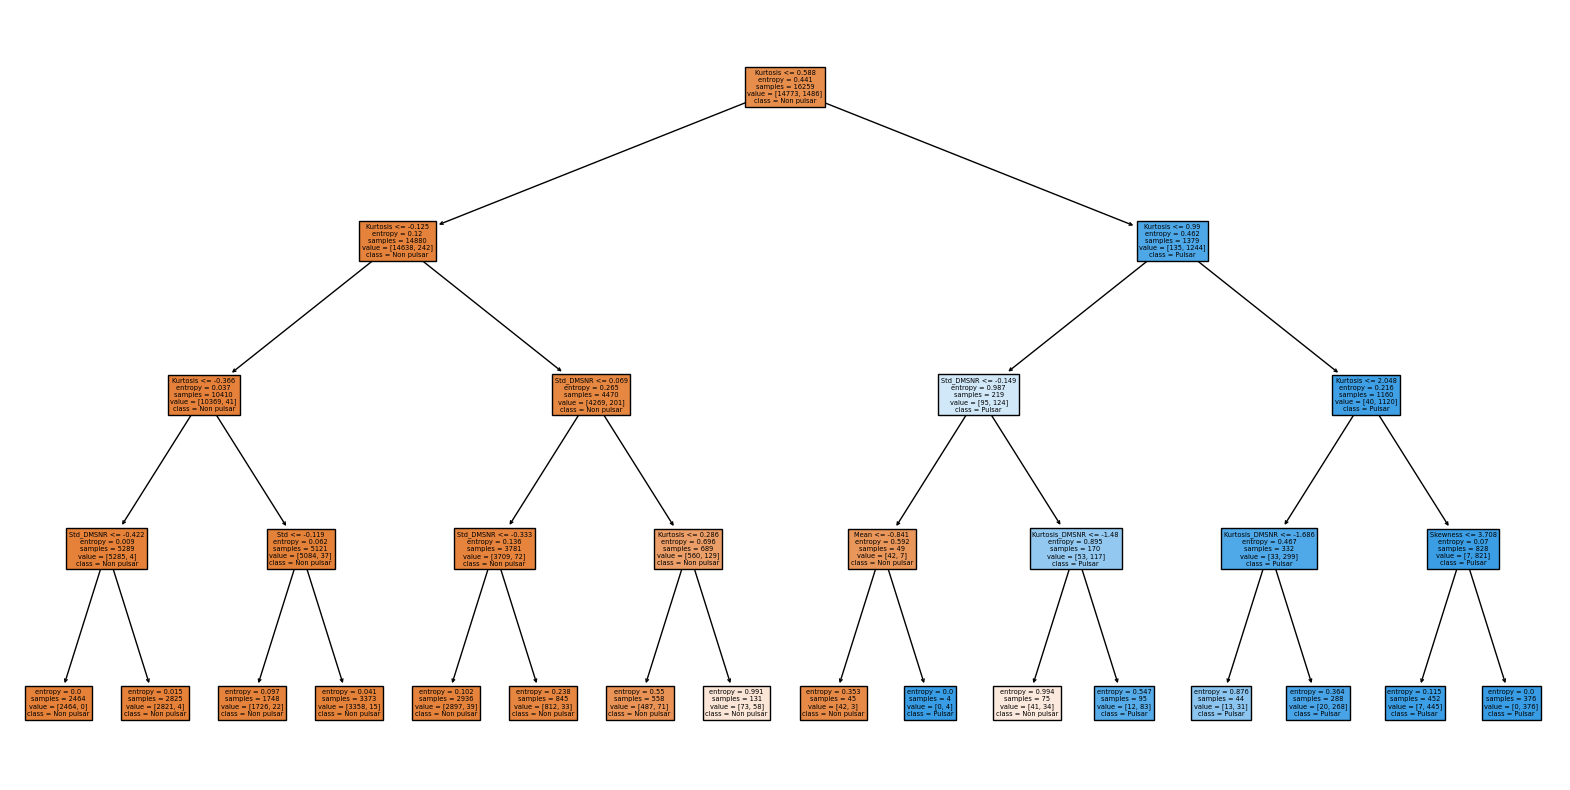

In [ ]:

custom_model.train(processor.X_train, processor.Y_train)

# 4.- **EVALUATION MODELS**

## LOSS AND ACCURACY CURVES

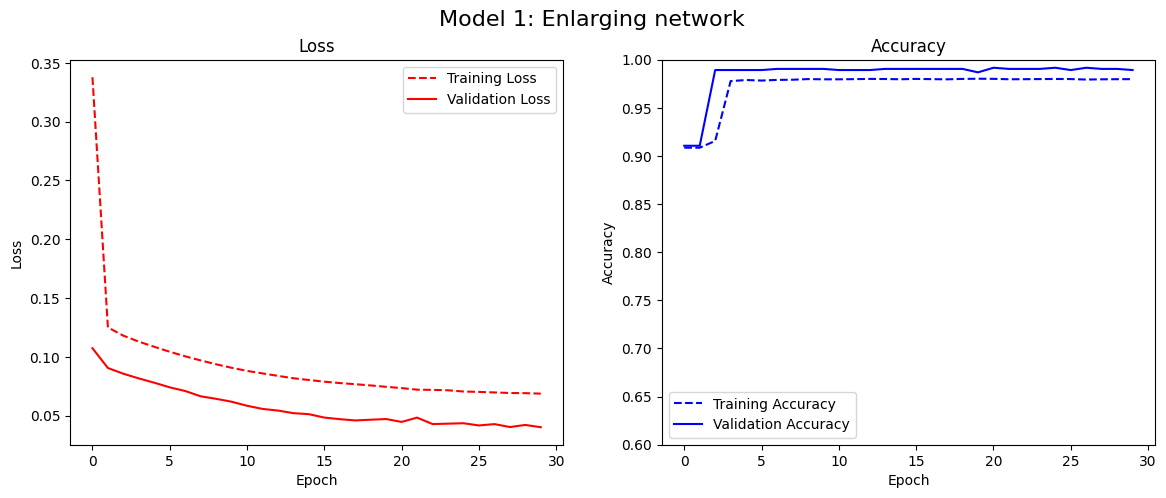

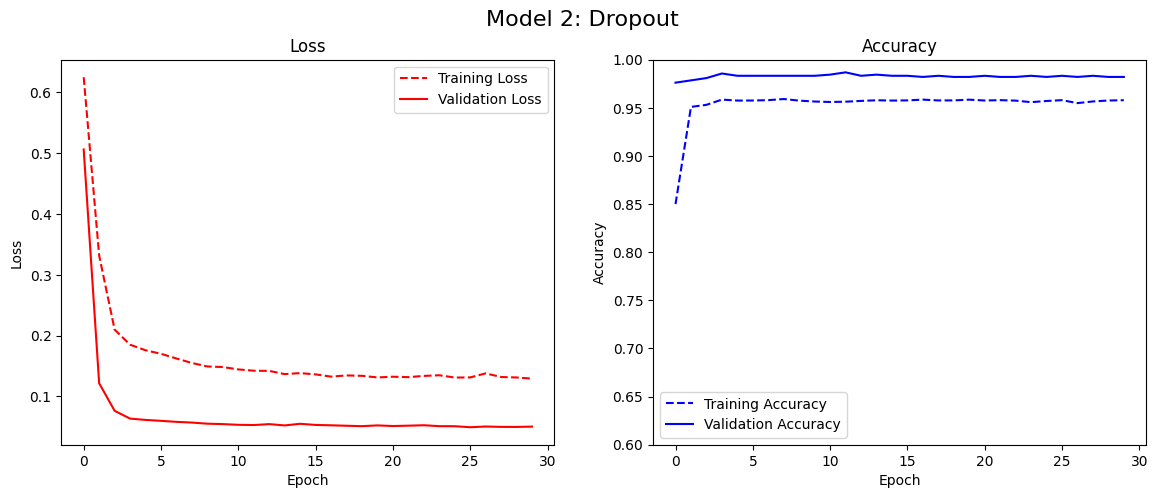

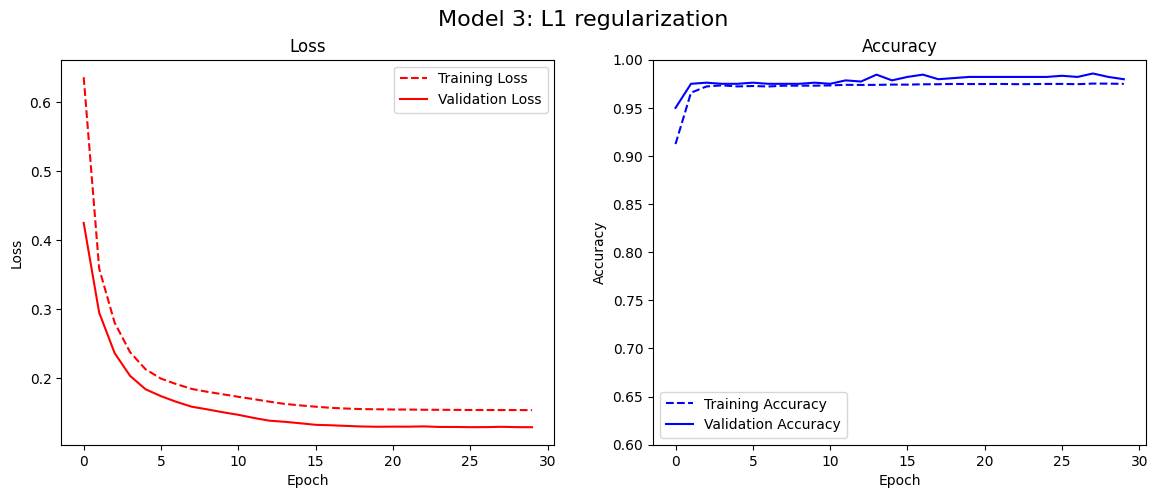

In [ ]:
trainer_1.plot_history()
trainer_2.plot_history()
trainer_3.plot_history()

# **Loss**
   **MODEL 1: Extended Network **


*   Training Loss	- Quickly decreases and stabilizes around 0.04.


*   Validation Loss	- Quickly decreases and stabilizes around 0.04.

**Model 2: Dropout**

- Training Loss - Quickly decreases and stabilizes around 0.05.
- Validation Loss - Quickly decreases and stabilizes around 0.06.

**Model 3: L1 Regularization**

- Training Loss - Decreases and stabilizes around 0.18.
- Validation Loss -Decreases and stabilizes around 0.16.

# ***ACCURACY***


**Model 1: Extended Network**
- Training Accuracy: Quickly increases and stabilizes around 0.98.
- Validation Accuracy: Quickly increases and stabilizes around 0.97.

**Model 2: Dropout**
- Training Accuracy: Quickly increases and stabilizes around 0.97.
- Validation Accuracy: Quickly increases and stabilizes around 0.96.

**Model 3: L1 Regularization**
- Training Accuracy: Quickly increases and stabilizes around 0.97.
- Validation Accuracy: Quickly increases and stabilizes around 0.96.






















## MODEL 1

27/27 [==============================] - 0s 2ms/step


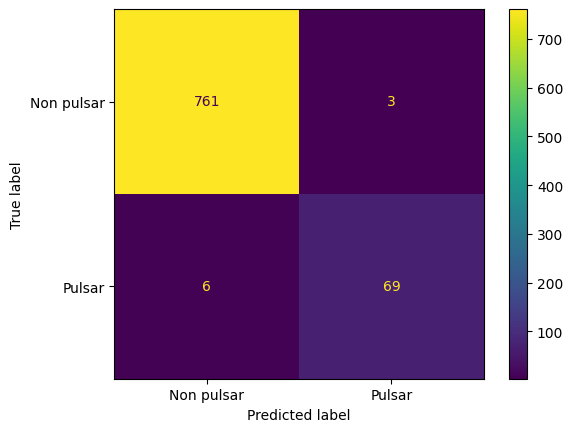

Accuracy: 0.9892729439809297
Precision: 0.9583333333333334
Recall: 0.92
F1 Score: 0.9387755102040817
27/27 [==============================] - 0s 1ms/step


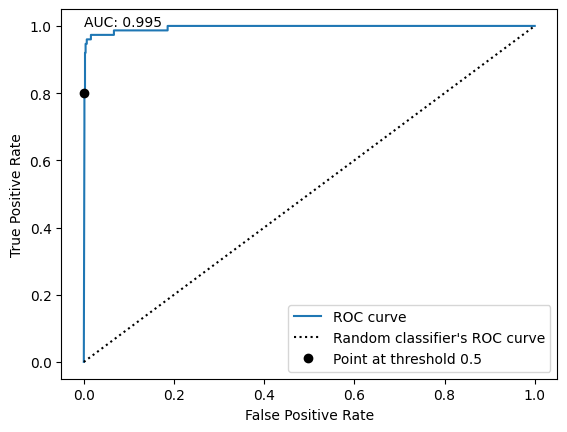

27/27 [==============================] - 0s 1ms/step


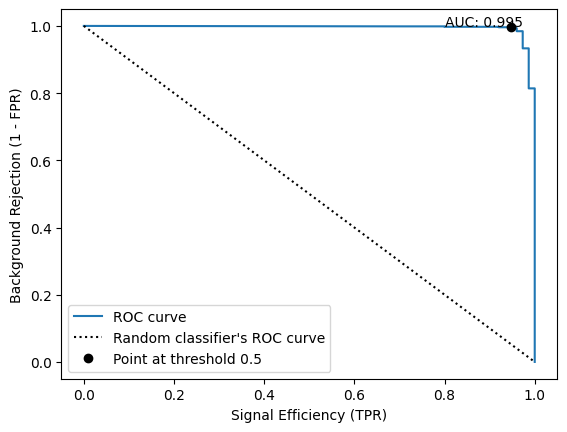

In [ ]:
trainer_1.plot_confusion_matrix()
trainer_1.plot_roc_curve_with_thresholds()
trainer_1.plot_roc_curve_with_efficiency_rejection()

## MODEL 2

27/27 [==============================] - 0s 1ms/step


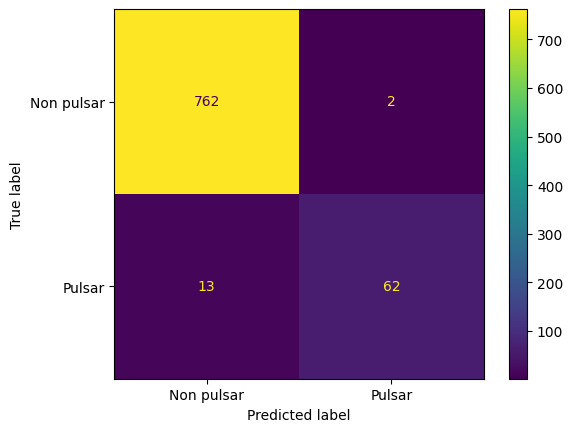

Accuracy: 0.9821215733015495
Precision: 0.96875
Recall: 0.8266666666666667
F1 Score: 0.8920863309352518
27/27 [==============================] - 0s 2ms/step


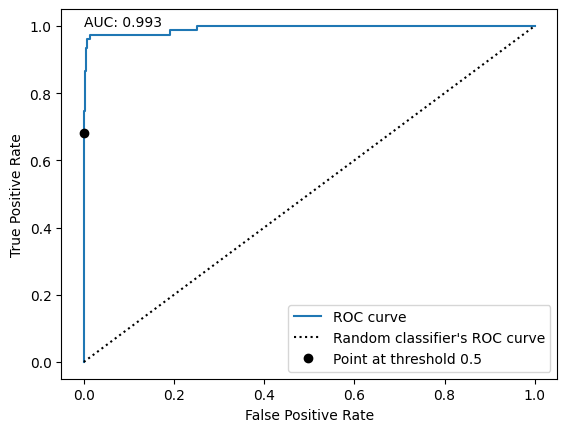

27/27 [==============================] - 0s 2ms/step


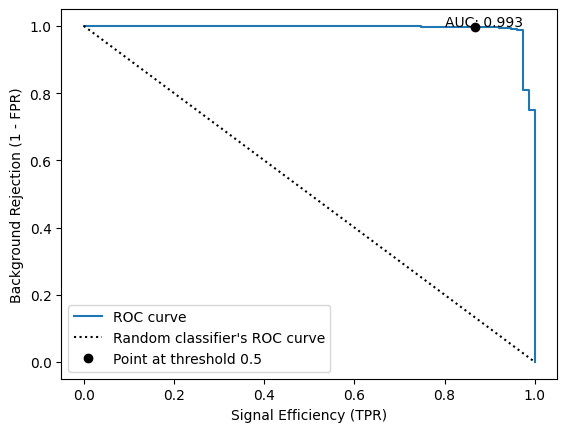

In [ ]:
trainer_2.plot_confusion_matrix()
trainer_2.plot_roc_curve_with_thresholds()
trainer_2.plot_roc_curve_with_efficiency_rejection()

## MODEL 3

27/27 [==============================] - 0s 2ms/step


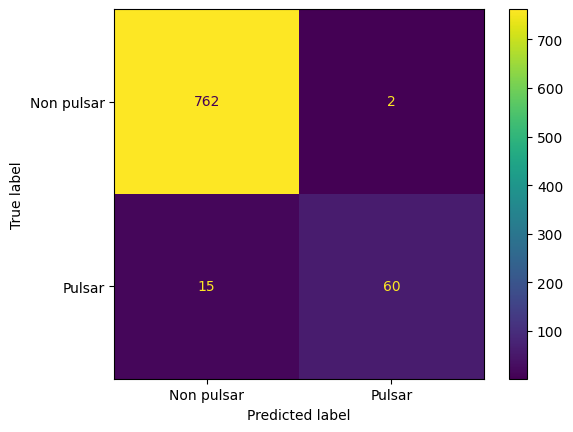

Accuracy: 0.9797377830750894
Precision: 0.967741935483871
Recall: 0.8
F1 Score: 0.8759124087591241
27/27 [==============================] - 0s 1ms/step


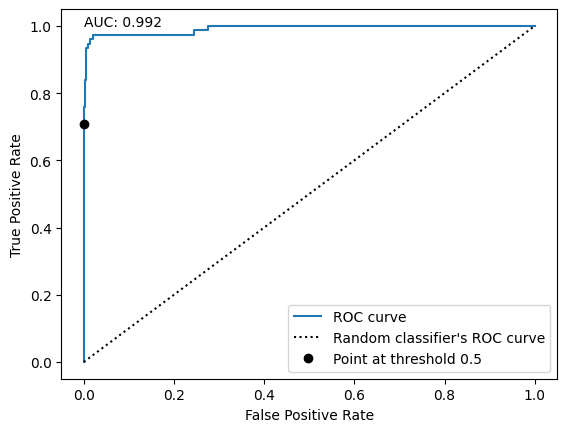

27/27 [==============================] - 0s 1ms/step


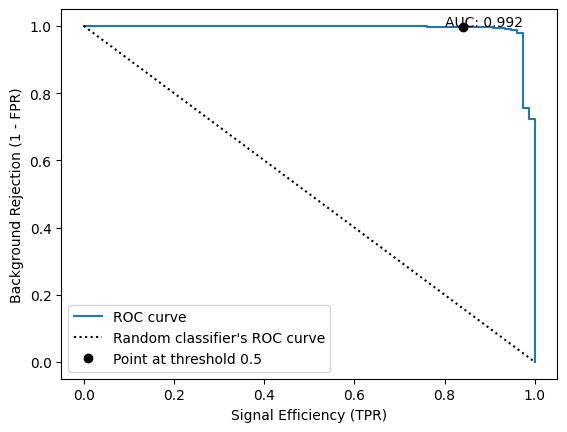

In [ ]:
trainer_3.plot_confusion_matrix()
trainer_3.plot_roc_curve_with_thresholds()
trainer_3.plot_roc_curve_with_efficiency_rejection()

## MODEL 4

Train accuracy: 0.9796420444061751
Test accuracy: 0.97625
Accuracy: 0.97625
Precision: 0.9538461538461539
Recall: 0.7948717948717948
F1 Score: 0.8671328671328672


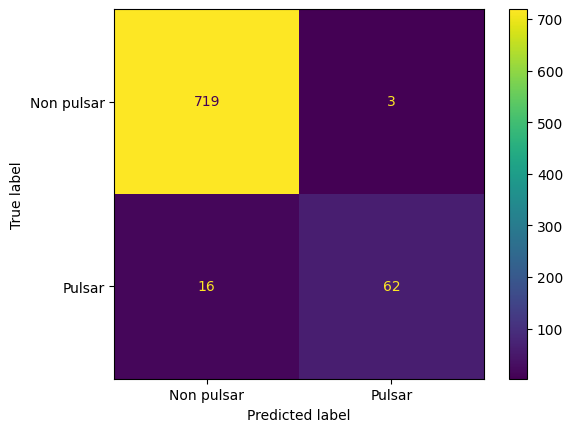

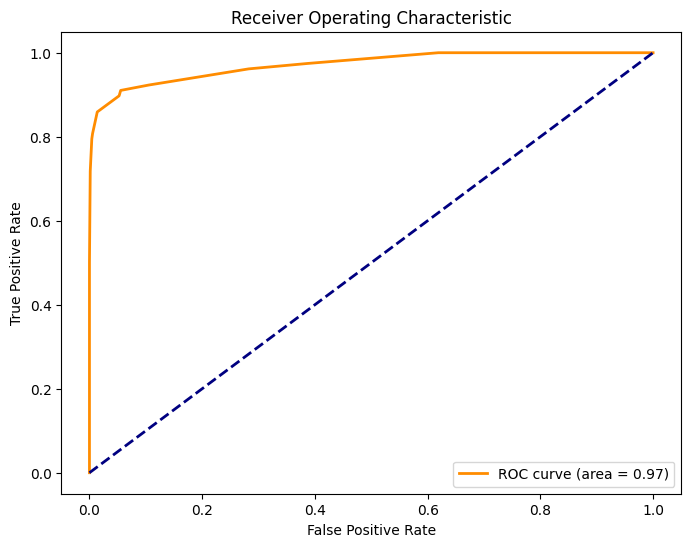

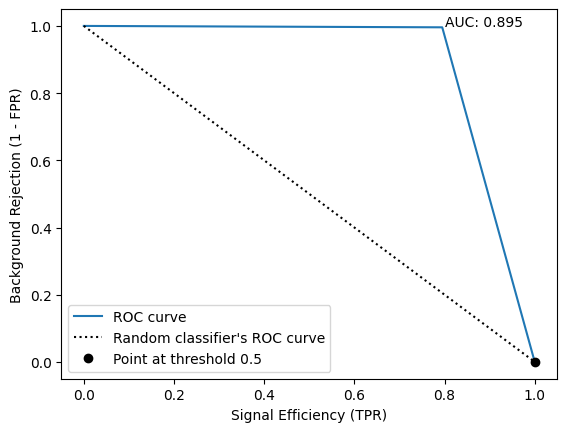

In [ ]:
custom_model.evaluate(processor.X_test, processor.Y_test)
custom_model.plot_confusion_matrix(processor.X_test, processor.Y_test)
custom_model.plot_roc_curve(processor.X_test, processor.Y_test)
custom_model.plot_roc_curve_with_efficiency_rejection(processor.X_test, processor.Y_test)

## ROC CURVE WITH ALL MODELS

27/27 [==============================] - 0s 3ms/step


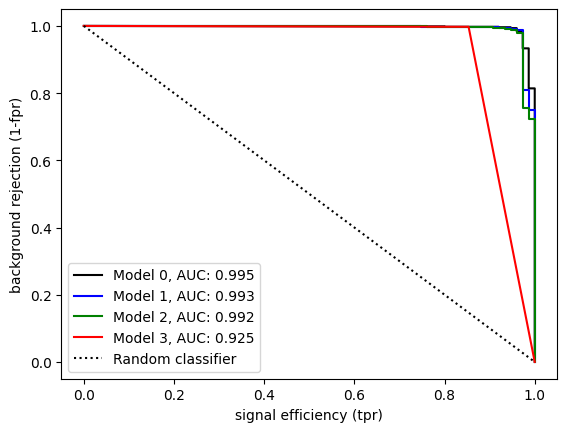

In [ ]:
models = [trainer_1.model, trainer_2.model, trainer_3.model, custom_model.model]
# Call the plotroc method passing the list of models
trainer_1.plotroc(models)

The ROC curves of the models indicate the discrimination capacity between classes. Based on area under the curve (AUC) values:

•	Model 1: Better overall discrimination.

•	Model 2: Similar to Model 1, but with less discrimination in terms of recall.

•	Model 3: Similar to Model 1, with an adequate balance.

•	Model 4: Similar in discrimination performance, but offers a simpler structure.
